#  <font color = 'blue'><center> Investment Analysis for Spark Funds </center></font> 

<h4>Problem Statement:</h4>Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.
Spark Funds has two minor constraints for investments:

-  It wants to invest between 5 to 15 million USD per round of investment

-  It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

In [1570]:
#import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b>companies.csv contains details of several companies <br>
rounds2.csv contains details of funding made by companies in several sectors</b>

Read the rounds2 and companies as dataframes using proper encoding technique 

In [1571]:
# Read the rounds2 and companies csvs using read_csv() function of pandas library

rounds = pd.read_csv("D:\AIML Pythn Notebooks\Statistics Analysis\Assignments\Assignment-1\\rounds2.csv",encoding= 'palmos')
companies = pd.read_csv("D:\AIML Pythn Notebooks\Statistics Analysis\Assignments\Assignment-1\\companies.csv",encoding= 'palmos')

Verify whether data is read correctly

In [1572]:
#Check the shape of the dataframes
print(rounds.shape)
print(companies.shape)

(114949, 6)
(66368, 10)


In [1573]:
# Remove any spaces that might be present at the either ends of columns
rounds.columns.str.strip()
companies.columns.str.strip()

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [1574]:
#Check the datatypes of all the columns of the rounds dataframe
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [1575]:
#Check the datatypes of all the columns of the companies dataframe
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


<b>Find number of unique companies in rounds2</b><br>
To find number of unique companies let us check if there any null values in company_permalink column rounds dataframe so that we can eliminate them

In [1576]:
#Check the number of null values in the columns  of rounds dataframe
rounds.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

As there are no null values in company_permalink column Proceed to finding number of unique companies

In [1577]:
# Retrieve first 5 rows of rounds dataframe
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


Data in company_permalink column doesnot seem to be following a particular order. <br> So Convert them into either upper or lower case before calculating number of distinct companies in rounds 

In [1578]:
# Convert the details in company_permalink to capital letters
rounds['company_permalink'] = rounds.company_permalink.apply(lambda x: x.upper())

#Find number of unique companies in rounds dataframe
rounds.company_permalink.nunique()

66368

<b>Find number of unique companies in comapnies file</b><br>To find number of unique companies let us check if there any null values in permalink column companies dataframe so that we can eliminate them

In [1579]:
#Check the number of null values in the columns  of rounds dataframe
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

As there are no null values in permalink column Proceed to finding number of unique companies

In [1580]:
#Retrieve first 5 rows from companies dataframe
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


Coverting permalink column to same order so that it would be easy to merge 

In [1581]:
# Convert the details in permalink to Upper case
companies['permalink'] = companies.permalink.apply(lambda x: x.upper())

#Find number of unique companies by finding number of unique values in permalink column
companies.permalink.nunique()

66368

The number of companies in both dataframes match but lets check if there are any companies that are different 

In [1582]:
#Find number of companies in rounds which are not in companies dataframe
rounds[~rounds.company_permalink.isin(companies.permalink.unique())].company_permalink.size

0

In [1583]:
#Find number of companies in rounds which are not in companies dataframe
companies[~companies.permalink.isin(rounds.company_permalink.unique())].permalink.size

0

<i>As the number of distinct values of permalink and number of rows are same and permalink has no null values. permalink column acts as primary key for companies</i>

<b> Merge the dataframes companies and rounds dataframes</b><br> Since we are interested in data present in both  dataframes  we will merge on permalink column to create a master_frame which can be used for Analysis

In [1584]:
#Merge Rounds and Companies Dataframes
master_frame = pd.merge(rounds,companies,how="inner",left_on='company_permalink',right_on='permalink')

The number of rows should be number of rows in master_frame should be<br> <i>rows in rounds - number of companies not matching to companies dataframe<i>=114949-0 = 114949 <br> <i>number of columns  = number of cols on companies + number of cols of rounds<i>  =10+6=16

In [1585]:
#Find the shape of dataframe
master_frame.shape

(114949, 16)

In [1586]:
#Check the datatypes of all the columns of the dataframe
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114949 non-null  object 
 7   name                     114948 non-null  object 
 8   homepage_url             108815 non-null  object 
 9   category_list            111539 non-null  object 
 10  status                   114949 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

<b>Data Handling and Cleaning</b><br>

Treating Missing Values and Removing redundant and unwanted columns

In [1587]:
# Check for null values in master_frame
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

We don't require funding_type_code column so dropping the column

In [1588]:
#Drop Column funding_round_code
master_frame = master_frame.drop('funding_round_code',axis=1)

company_permalink and permalink represent the same data so we don't require both of them one should be sufficient so dropping company_permalink  column

In [1589]:
#Drop Column company_permalink
master_frame = master_frame.drop('company_permalink',axis=1)

In [1590]:
#Check shape the dataframe
master_frame.shape

(114949, 14)

In [1591]:
# Check for null values in master_frame
master_frame.isnull().sum()

funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [1592]:
#Convert raised_amount_usd to millions
master_frame['amount_usd_millions'] = master_frame['raised_amount_usd'].apply(lambda x: round(x/1000000,2))

In [1593]:
#Find the median, 25 percentile, and 75 percentile of raised_amount_used
master_frame.amount_usd_millions.quantile([0,0.25,0.5,0.75])

0.00    0.00
0.25    0.32
0.50    1.68
0.75    7.00
Name: amount_usd_millions, dtype: float64

In [1594]:
#Find Mean of raised_amount_used
master_frame.amount_usd_millions.mean()

10.426907928685933

In [1595]:
#Find funding_round_types of rows for which raised_amount_usd is null
master_frame[master_frame.isnull()].funding_round_type.nunique()

0

<i>Claerly we can't substitute values for null as there is huge variance between mean, 50% value. And one more column which is one of the dependency for analysis is null for all the rows where raised_amount_usd is null <br> Also we will be doing analysis on values of this column so it is better we drop the rows having null values</i>

In [1596]:
#Companies for which raised_amount_usd is null
master_frame = master_frame[~(master_frame.amount_usd_millions.isnull())]

In [1597]:
#Display Top 5 Rows
master_frame.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,amount_usd_millions
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,10.00
2,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,0.70
3,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,3.41
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,2.00
6,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0,/ORGANIZATION/01GAMES-TECHNOLOGY,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,0.04


In [1598]:
#Find Shape of the dataframe
master_frame.shape

(94959, 15)

In [1599]:
## Check for null values in master_frame
master_frame.isnull().sum()

funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           1
homepage_url                4332
category_list               1044
status                         0
country_code                5851
state_code                  7604
region                      7048
city                        7045
founded_at                 15966
amount_usd_millions            0
dtype: int64

In [1600]:
#Find comapnies for which country code is not present
master_frame[master_frame.country_code.isnull()]

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,amount_usd_millions
3,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,3.41
32,/funding-round/854fae13c5b26b2ea6b32b06c2e5890c,angel,01-04-2010,43923865.0,/ORGANIZATION/1000CHI,Beijing 1000CHI Software Technology,http://www.1000chi.com/,Mobile,operating,NaN,NaN,NaN,NaN,01-01-2008,43.92
66,/funding-round/95401c8e8336892bf375ad94efd6c725,seed,04-09-2015,100000.0,/ORGANIZATION/10K-2,Beans Around,http://beansaround.com/,Coffee|Delivery|Subscription Service,operating,NaN,NaN,NaN,NaN,01-04-2015,0.10
95,/funding-round/6343322ed785252d4c5ada444fa7d8e4,venture,22-11-2013,150267.0,/ORGANIZATION/1234ENTER,1234ENTER,http://www.1234enter.com.br,Advertising|Analytics|Business Services|E-Comm...,operating,NaN,NaN,NaN,NaN,01-01-2012,0.15
96,/funding-round/ee6f9dea78c9a0697a500098a854564d,seed,01-09-2012,500000.0,/ORGANIZATION/1234ENTER,1234ENTER,http://www.1234enter.com.br,Advertising|Analytics|Business Services|E-Comm...,operating,NaN,NaN,NaN,NaN,01-01-2012,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114752,/funding-round/e8fa50bcf4086dc88c07a901258b8b4f,seed,20-06-2011,40000.0,/ORGANIZATION/ZUGGI,ZUGGI,http://www.zuggi.com.br/home.php,Search,operating,NaN,NaN,NaN,NaN,01-11-2010,0.04
114835,/funding-round/785ed8667f9d950257f94089050d6eb0,angel,16-09-2014,200000.0,/ORGANIZATION/ZUUMTEL,ZUUMTEL,http://www.zuumtel.com,Automotive|Design|Real Time,closed,NaN,NaN,NaN,NaN,16-09-2014,0.20
114836,/funding-round/d5d97d7c8a5e923715b15495d44e7cb8,seed,01-04-2013,100000.0,/ORGANIZATION/ZUUMTEL,ZUUMTEL,http://www.zuumtel.com,Automotive|Design|Real Time,closed,NaN,NaN,NaN,NaN,16-09-2014,0.10
114849,/funding-round/eb5163bb6feea4384121e27699bb7b25,seed,01-09-2014,60000.0,"/ORGANIZATION/ZWAYO-""ON-DEMAND-VALET-PARKING""","Zwayo ""On-Demand Valet Parking""",http://www.zwayo.co,Apps|Cars|Parking,operating,NaN,NaN,NaN,NaN,01-09-2014,0.06


Assuming that we can fetch country code based on either state code, region or city  lets find out the number of rows for which all the mentioned values are null and lets try to figure out country for others.

In [1601]:
#Find number of rows for which country_code,state_code, city, Region are null
(master_frame.country_code.isnull() & master_frame.state_code.isnull() & master_frame.region.isnull() & master_frame.city.isnull()).sum()

5851

The above number is same as number of null country_code values. So delete all the rows for which country code is null.

In [1602]:
#Drop rows for which all country_code are null
master_frame = master_frame[~(master_frame.country_code.isnull())]

In [1603]:
#Find shape of dataframe
master_frame.shape

(89108, 15)

In [1604]:
#Find number of null values in columns
master_frame.isnull().sum()

funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           1
homepage_url                3378
category_list                579
status                         0
country_code                   0
state_code                  1753
region                      1197
city                        1194
founded_at                 13658
amount_usd_millions            0
dtype: int64

We don't require columns state_code , region , city anymore as country is determined and we would be analysing for English speaking countries based on country_code

In [1605]:
# Drop state_code , region, city columns
master_frame = master_frame.drop(['state_code','region','city'],axis=1)

In [1606]:
#Find shape of master_frame
print(master_frame.shape)

#Find number of null values in rows of data frame
master_frame.isnull().sum()

(89108, 12)


funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           1
homepage_url                3378
category_list                579
status                         0
country_code                   0
founded_at                 13658
amount_usd_millions            0
dtype: int64

We are also not interested in founded_at and homepage_url columns. so dropping those columns

In [1607]:
#Drop Columns founded_at and homepage_url
master_frame = master_frame.drop(['founded_at','homepage_url'],axis=1)

In [1608]:
# Find shape of master_frame
master_frame.shape

(89108, 10)

In [1609]:
#View the sum of remaining null values in columns
master_frame.isnull().sum()

funding_round_permalink      0
funding_round_type           0
funded_at                    0
raised_amount_usd            0
permalink                    0
name                         1
category_list              579
status                       0
country_code                 0
amount_usd_millions          0
dtype: int64

In [1610]:
# Display permalink and name columns for comparison
master_frame[['permalink','name']]

,permalink,name
0,/ORGANIZATION/-FAME,#fame
2,/ORGANIZATION/-QOUNTER,:Qounter
4,/ORGANIZATION/0-6-COM,0-6.com
6,/ORGANIZATION/01GAMES-TECHNOLOGY,01Games Technology
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.
...,...,...
114942,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.
114943,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.
114944,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.
114945,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.


In [1611]:
#Display row for which name is null
master_frame[master_frame.name.isnull()]

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,amount_usd_millions
98692,/funding-round/9c987e616755a78c51a4aa67c27a2a93,seed,01-03-2012,25000.0,/ORGANIZATION/TELL-IT-IN,NaN,Startups,closed,USA,0.03


As we observed the name of the company has close relationship with permalink so imputing the name 

In [1612]:
#impute name into missing name field
master_frame.loc[98692,'name'] = master_frame.loc[98692,'permalink'].split("/")[-1]

In [1613]:
# Check value in that row
master_frame.loc[98692,'name']

'TELL-IT-IN'

Spark funds is also interested in investing in particular Category . So We can't have null values in Category. So removing rows where category_list is null

In [1614]:
# Remove rows where category_list is null
master_frame = master_frame[~master_frame.category_list.isnull()]

#Check if there are any null values
master_frame.isnull().sum()

funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
permalink                  0
name                       0
category_list              0
status                     0
country_code               0
amount_usd_millions        0
dtype: int64

In [1615]:
#Check shape of master_frame
master_frame.shape

(88529, 10)

We are interested only in few columns namely category_list,country_code ,amount_usd_millions, funding_round_type as spark funds is interested only in funding_type and sector needed to be invested in

In [1616]:
# Create datframe with only required fields
master_frame = master_frame[[ 'name','category_list', 'country_code' ,'amount_usd_millions','funding_round_type']]

In [1617]:
#Display top 5 rows
master_frame.head()

,name,category_list,country_code,amount_usd_millions,funding_round_type
0,#fame,Media,IND,10.00,venture
2,:Qounter,Application Platforms|Real Time|Social Network...,USA,0.70,seed
4,0-6.com,Curated Web,CHN,2.00,venture
6,01Games Technology,Games,HKG,0.04,undisclosed
7,Ondine Biomedical Inc.,Biotechnology,CAN,0.04,seed


<b>Spark Funds wants to choose one of these four investment types namely venture, angel, seed, and private equity for each potential investment they will make.</b>

In [1618]:
# Create a new master frame with only desired funding_round_type
master_frame = master_frame[(master_frame.funding_round_type.isin(['venture','angel','seed','private_equity']))]

# Display top 5 rows
master_frame.head()

,name,category_list,country_code,amount_usd_millions,funding_round_type
0,#fame,Media,IND,10.00,venture
2,:Qounter,Application Platforms|Real Time|Social Network...,USA,0.70,seed
4,0-6.com,Curated Web,CHN,2.00,venture
7,Ondine Biomedical Inc.,Biotechnology,CAN,0.04,seed
8,Ondine Biomedical Inc.,Biotechnology,CAN,0.72,venture


In [1619]:
#Check the quantitative spread of the dataframe f0r the particular funding round type
master_frame.groupby('funding_round_type').amount_usd_millions.describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4400.0,0.971627,7.710871,0.0,0.15,0.41,1.00,494.51
private_equity,1820.0,73.938495,201.776487,0.0,5.00,20.00,75.76,4745.46
seed,21095.0,0.747907,2.288280,0.0,0.07,0.30,1.00,200.00
venture,47809.0,11.724228,88.215710,0.0,1.60,5.00,12.00,17600.00


Observing above vales it is very clear that we have to chose venture funding_type <br>
Lets illustrate the same using plots

In [1620]:
# Average funding amount for venture type
venture_mean = master_frame[master_frame['funding_round_type']=='venture'].amount_usd_millions.mean()
print(f"Average funding amount raised for venture: {round(venture_mean, 2)}")

# Average funding amount for angel type
angel_mean = master_frame[master_frame['funding_round_type']=='angel'].amount_usd_millions.mean()
print(f"Average funding amount raised for angel: {round(angel_mean, 2)}")

# Average funding amount for seed type
seed_mean = master_frame[master_frame['funding_round_type']=='seed'].amount_usd_millions.mean()
print(f"Average funding amount raised for seed {round(seed_mean, 2)}")

# Average funding amount for private equity type
equity_mean = master_frame[master_frame['funding_round_type']=='private_equity'].amount_usd_millions.mean()
print(f"Average funding amount raised doe private_equity: {round(equity_mean, 2)}")

Average funding amount raised for venture: 11.72
Average funding amount raised for angel: 0.97
Average funding amount raised for seed 0.75
Average funding amount raised doe private_equity: 73.94


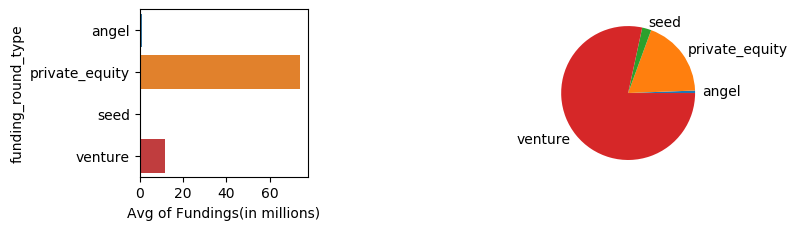

In [1621]:
# Create a plot to decide on type of funding_round_type
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(4, 4, 1)
ax2 = plt.subplot(4, 4, 3)

plt.style.use("default")
round_types = master_frame.funding_round_type.value_counts()



avg_dataframe = master_frame.groupby('funding_round_type')['amount_usd_millions'].aggregate(['sum','mean']).reset_index()
avg_dataframe['percent_investment'] = avg_dataframe['sum'].apply(lambda x : x/avg_dataframe['sum'].sum())
#avg_dataframe = avg_dataframe.set_index('funding_round_type',inplace=True)
sns.barplot(data=avg_dataframe,y='funding_round_type', x='mean', ax=ax1).set(xlabel='Avg of Fundings(in millions)')
plt.pie(avg_dataframe.percent_investment,labels=avg_dataframe.funding_round_type)

plt.show()

In [1622]:
# creating a new dataframe consisting of funding_round_type venture
inv_dataframe = master_frame[master_frame.funding_round_type=='venture']

In [1623]:
# Find shape of seed dataframe
inv_dataframe.shape

(47809, 5)

In [1624]:
#Find different country codes in the dataframe
inv_dataframe.country_code.unique()

array(['IND', 'CHN', 'CAN', 'USA', 'GBR', 'FRA', 'ROM', 'KOR', 'IRL',
       'SWE', 'SGP', 'NLD', 'RUS', 'BEL', 'ESP', 'HUN', 'JPN', 'DEU',
       'ITA', 'HKG', 'BRA', 'FIN', 'CHE', 'PRT', 'SVN', 'THA', 'DNK',
       'TWN', 'ISR', 'NOR', 'LTU', 'ISL', 'MEX', 'AUS', 'NZL', 'AUT',
       'ARG', 'PHL', 'MNE', 'MYS', 'TUR', 'POL', 'LVA', 'GGY', 'EST',
       'LBN', 'GRC', 'IDN', 'CYP', 'SVK', 'ARE', 'EGY', 'ARM', 'ZAF',
       'TUN', 'KEN', 'COL', 'CZE', 'CMR', 'PRI', 'CYM', 'PER', 'ECU',
       'CHL', 'NGA', 'VNM', 'URY', 'PAK', 'HRV', 'LUX', 'UKR', 'BMU',
       'MUS', 'BGR', 'TTO', 'PAN', 'MMR', 'JOR', 'KAZ', 'MAR', 'LIE',
       'GTM', 'SAU', 'TAN', 'KNA', 'SEN', 'MLT', 'MCO', 'BAH', 'GHA',
       'KWT', 'UGA', 'LAO', 'BGD', 'BWA', 'MAF', 'GIB'], dtype=object)

Creating a list of countries where English is an official language<br>
<b>source:</b> https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language

In [1625]:
# Creating list of English Speaking Countries
eng_countries = ['AUS','NZL','GBR','USA','ATG','BHS','BRB','BLZ','BWA','BDI','CMR','CAN','COK','DMA','SWZ','FJI','GMB','GHA','GRD','GUY','IND','IRL','JAM','KEN','KIR','LSO','LBR','MWI','MLT','MHL','MUS',
                'FSM','NAM','NRU','NGA','NIU','PAK','PLW','PNG','PHL','RWA','KNA','LCA','VCT','WSM','SYC','SLE','SGP','SLB','ZAF','SSD','SDN','TZA','TON','TTO','TUV','UGA','VUT','ZMB','ZWE']

In [1626]:
#Display Top 5 Rows of inv_dataframe
inv_dataframe.head()

,name,category_list,country_code,amount_usd_millions,funding_round_type
0,#fame,Media,IND,10.00,venture
4,0-6.com,Curated Web,CHN,2.00,venture
8,Ondine Biomedical Inc.,Biotechnology,CAN,0.72,venture
10,H2O.ai,Analytics,USA,20.00,venture
11,H2O.ai,Analytics,USA,1.70,venture


In [1627]:
#Reset Index
inv_dataframe = inv_dataframe.reset_index()

#Display top 5 rows
inv_dataframe.head()

,index,name,category_list,country_code,amount_usd_millions,funding_round_type
0,0,#fame,Media,IND,10.00,venture
1,4,0-6.com,Curated Web,CHN,2.00,venture
2,8,Ondine Biomedical Inc.,Biotechnology,CAN,0.72,venture
3,10,H2O.ai,Analytics,USA,20.00,venture
4,11,H2O.ai,Analytics,USA,1.70,venture


In [1628]:
#Drop index column 
inv_dataframe = inv_dataframe.drop('index',axis=1)

# Display Top 5 rows of seed_dataframe
inv_dataframe.head()

,name,category_list,country_code,amount_usd_millions,funding_round_type
0,#fame,Media,IND,10.00,venture
1,0-6.com,Curated Web,CHN,2.00,venture
2,Ondine Biomedical Inc.,Biotechnology,CAN,0.72,venture
3,H2O.ai,Analytics,USA,20.00,venture
4,H2O.ai,Analytics,USA,1.70,venture


In [1629]:
# Create a dataframe top9 where investments are high
top9 = inv_dataframe.groupby('country_code')['amount_usd_millions'].sum().sort_values(ascending=False).reset_index().head(9)

# Rename the column name to total_funding
top9 = top9.rename(columns={'amount_usd_millions':'total_funding'})

#Display top9
top9

,country_code,total_funding
0,USA,420068.26
1,CHN,39338.82
2,GBR,20072.77
3,IND,14261.52
4,CAN,9482.26
5,FRA,7226.82
6,ISR,6854.34
7,DEU,6307.00
8,JPN,3167.68


In [1630]:
# Insert a column English_Speaking
top9['English_Speaking'] = top9.country_code.apply(lambda con : True if con in eng_countries else False)

# Display top9
top9

,country_code,total_funding,English_Speaking
0,USA,420068.26,True
1,CHN,39338.82,False
2,GBR,20072.77,True
3,IND,14261.52,True
4,CAN,9482.26,True
5,FRA,7226.82,False
6,ISR,6854.34,False
7,DEU,6307.00,False
8,JPN,3167.68,False


In [1631]:
# Display top3 English speaking countries
top3_english = top9[top9['English_Speaking']].head(3)

#Display top3_english
top3_english

,country_code,total_funding,English_Speaking
0,USA,420068.26,True
2,GBR,20072.77,True
3,IND,14261.52,True


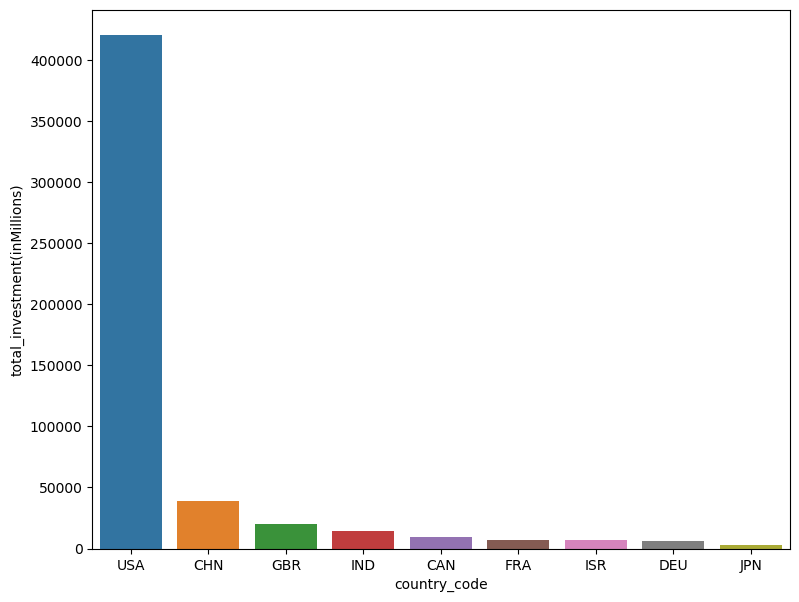

In [1632]:
# Plot a graph to understand distributions
plt.figure(figsize=(9,7))
plt.style.use("default")
sns.barplot(x=top9.country_code, y=top9.total_funding.ravel()).set(ylabel='total_investment(inMillions)')
plt.show()


In [1633]:
# Create a final datframe with venture funding type and top3 english speaking countries
final_frame = inv_dataframe[inv_dataframe.country_code.isin(top3_english.country_code)]

#Reset the Index of dataframe
final_frame = final_frame.reset_index()

# Drop previous index column
final_frame =  final_frame.drop(['index'],axis=1)

In [1634]:
#Dispaly top 5 rows
final_frame.head()

,name,category_list,country_code,amount_usd_millions,funding_round_type
0,#fame,Media,IND,10.0,venture
1,H2O.ai,Analytics,USA,20.0,venture
2,H2O.ai,Analytics,USA,1.7,venture
3,H2O.ai,Analytics,USA,8.9,venture
4,1 Mainstream,Apps|Cable|Distribution|Software,USA,5.0,venture


In [1635]:
# Display shape of final_frame
final_frame.shape

(38803, 5)

<b>Business Rule:</b>  The first string before the vertical bar will be considered the primary sector in catrgory_list

In [1636]:
# Create a column Category using category_list
final_frame['primary_sector'] = final_frame['category_list'].apply(lambda x: str(str(x).split("|")[0]))

# Display top5 rows
final_frame.head()

,name,category_list,country_code,amount_usd_millions,funding_round_type,primary_sector
0,#fame,Media,IND,10.0,venture,Media
1,H2O.ai,Analytics,USA,20.0,venture,Analytics
2,H2O.ai,Analytics,USA,1.7,venture,Analytics
3,H2O.ai,Analytics,USA,8.9,venture,Analytics
4,1 Mainstream,Apps|Cable|Distribution|Software,USA,5.0,venture,Apps


We refer to one of the eight main sectors (named main_sector) listed in the mapping file (note that ‘Other’ is one of the eight main sectors). This is to simplify the analysis by grouping the numerous category lists in the mapping file.

In [1637]:
# Import Mapping file
mapping = pd.read_csv("D:\AIML Pythn Notebooks\Statistics Analysis\Assignments\Assignment-1\\mapping.csv",encoding= 'palmos')

# Display Top 5 Rows
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [1638]:
# Print first 5 rows of dataframe
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [1639]:
#Check whether there are any null values in mapping dataframe
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [1640]:
#Display the eow that has null values in category_list
mapping[mapping.category_list.isnull()]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0


The category_list NaN is for specifying that there is no such category. so it need not be considered as a missing value

Most of the values in category_list should contain only charecters. Lets verify before proceeding

In [1641]:
#serach for values which have Numeric/ symbols in the category_list column
mapping[mapping.category_list.str.match(r'^[a-zA-Z ]+$')==False]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
20,Alter0tive Medicine,0,0,0,0,1,0,0,0,0
22,A0lytics,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
633,Supply Chain Ma0gement,0,0,0,0,0,0,0,1,0
637,Task Ma0gement,0,0,0,0,0,0,0,1,0
654,Travel & Tourism,0,0,0,1,0,0,0,0,0
664,Veteri0ry,0,0,0,0,1,0,0,0,0


Looking at The data retrieved  seems most of the data is in order except at places 'na' semms to be replaced by 0. So lets correct that back to na

In [1642]:
# Replace o by na in category_list
mapping['category_list']=mapping['category_list'].str.replace('0','na')

Now that we got correct dataframe of mapping lets melt down the mapping dataframe

In [1643]:
#melt to create mapping_sector dataframe
mapping_sector = mapping.melt(id_vars=['category_list'],value_name='sector_value')

#seggregate values on sector_value=1
mapping_sector = mapping_sector[mapping_sector.sector_value==1]

In [1644]:
#Print top 5 rows of mapping_sector
mapping_sector

,category_list,variable,sector_value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
...,...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising",1
6122,Social Television,"Social, Finance, Analytics, Advertising",1
6123,Social Travel,"Social, Finance, Analytics, Advertising",1
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


Remove sector_value column and reset index

In [1645]:
# Reset Index and drop unwanted columns
mapping_sector = mapping_sector.reset_index().drop(['index','sector_value'],axis=1)

In [1646]:
# Merge dataframes final_frame and mapping_sector on category_list
analysis_master = pd.merge(final_frame,mapping_sector,how='inner',on='category_list')

#Display top 5 rows
analysis_master.head()

,name,category_list,country_code,amount_usd_millions,funding_round_type,primary_sector,variable
0,#fame,Media,IND,10.00,venture,Media,Entertainment
1,All Def Digital,Media,USA,5.00,venture,Media,Entertainment
2,Genius Monkey,Media,USA,2.00,venture,Media,Entertainment
3,Glass Media,Media,USA,0.03,venture,Media,Entertainment
4,Marine Construction Technologies,Media,USA,0.12,venture,Media,Entertainment


In [1647]:
#Rename column variable
analysis_master.rename(columns = {'variable':'main_sector'},inplace = True)

#Display top 5 rows
analysis_master.head()

,name,category_list,country_code,amount_usd_millions,funding_round_type,primary_sector,main_sector
0,#fame,Media,IND,10.00,venture,Media,Entertainment
1,All Def Digital,Media,USA,5.00,venture,Media,Entertainment
2,Genius Monkey,Media,USA,2.00,venture,Media,Entertainment
3,Glass Media,Media,USA,0.03,venture,Media,Entertainment
4,Marine Construction Technologies,Media,USA,0.12,venture,Media,Entertainment


In [1648]:
#Check for any null values
analysis_master.isnull().sum()

name                   0
category_list          0
country_code           0
amount_usd_millions    0
funding_round_type     0
primary_sector         0
main_sector            0
dtype: int64

In [1649]:
# Drop all rows which couldn't get mapped (and we drop blanks as there are only 8 sectors)
analysis_master = analysis_master[analysis_master['main_sector'] != 'Blanks']

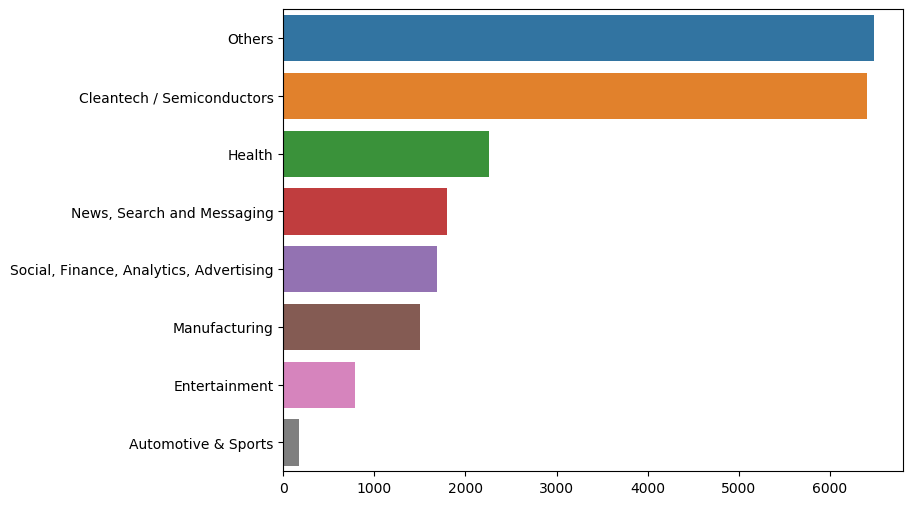

In [1651]:
# Draw a barplot for all sectors and their frequency of occurance in dataframe

sector_vals = analysis_master.main_sector.value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sector_vals.values, y=sector_vals.index)
plt.show()


We know the top three English speaking countries(USA,GBR,IND) and the most suitable funding type for Spark Funds. <br>
Also, the range of funding preferred by Spark Funds is 5 to 15 million USD.<br>
Now, the aim is to find out the most heavily invested main sectors in each of the three countries<br> 
D1-USA , D2=GBR , D3=IND

## USA

In [1653]:
# Create Dataframe D1 for country USA with 
D1 = analysis_master[(analysis_master.country_code=='USA') & (analysis_master.amount_usd_millions>=5) & (analysis_master.amount_usd_millions<=15)] 


#Reset Index of dataframe
D1 = D1.reset_index().drop('index',axis=1)

#Creating Pivot Table  for detailed analysis
D1_groupby = D1.groupby(D1.main_sector).amount_usd_millions.aggregate(['count','sum'])

#Add details of grouping to D1
D1['main_sector_invest'] = D1['main_sector'].apply(lambda x : D1_groupby.loc[x,'count'])
D1['main_sector_invest_amount'] = D1['main_sector'].apply(lambda x : D1_groupby.loc[x,'sum'])


# Total number of Investments
print(D1.main_sector.count())

#Total Amount of Investment
print(D1.amount_usd_millions.sum())

#Print top 5 rows
D1.head()



6155
55075.98


,name,category_list,country_code,amount_usd_millions,funding_round_type,primary_sector,main_sector,main_sector_invest,main_sector_invest_amount
0,All Def Digital,Media,USA,5.00,venture,Media,Entertainment,198,1702.13
1,H2O.ai,Analytics,USA,8.90,venture,Analytics,"Social, Finance, Analytics, Advertising",529,4519.59
2,Accelerated Vision Group,Analytics,USA,6.00,venture,Analytics,"Social, Finance, Analytics, Advertising",529,4519.59
3,Affectiva,Analytics,USA,12.00,venture,Analytics,"Social, Finance, Analytics, Advertising",529,4519.59
4,Affectiva,Analytics,USA,5.72,venture,Analytics,"Social, Finance, Analytics, Advertising",529,4519.59


## GBR

In [1656]:
# Create Dataframe D2 for country GBR with 
D2 = analysis_master[(analysis_master.country_code=='GBR') & (analysis_master.amount_usd_millions>=5) & (analysis_master.amount_usd_millions<=15)] 

#Reset Index of dataframe
D2 = D2.reset_index().drop('index',axis=1)

#Creating Pivot Table  for detailed analysis
D2_groupby = D2.groupby(D2.main_sector).amount_usd_millions.aggregate(['count','sum'])

#Add details of grouping to D1
D2['main_sector_invest'] = D2['main_sector'].apply(lambda x : D2_groupby.loc[x,'count'])
D2['main_sector_invest_amount'] = D2['main_sector'].apply(lambda x : D2_groupby.loc[x,'sum'])


#Display top 5 rows D1
D2.head()


# Total number of Investments
print(D2.main_sector.count())

#Total Amount of Investment
print(D2.amount_usd_millions.sum())

#print top 5 Rows
D2.head()

343
3027.93


,name,category_list,country_code,amount_usd_millions,funding_round_type,primary_sector,main_sector,main_sector_invest,main_sector_invest_amount
0,Smart Cube,Analytics,GBR,6.41,venture,Analytics,"Social, Finance, Analytics, Advertising",24,205.61
1,Starcount,Curated Web,GBR,7.46,venture,Curated Web,"News, Search and Messaging",31,274.14
2,mySupermarket,Curated Web,GBR,7.40,venture,Curated Web,"News, Search and Messaging",31,274.14
3,mySupermarket,Curated Web,GBR,6.00,venture,Curated Web,"News, Search and Messaging",31,274.14
4,mySupermarket,Curated Web,GBR,10.00,venture,Curated Web,"News, Search and Messaging",31,274.14


## IND

In [1657]:
# Create Dataframe D3 for country CAN with 
D3 = analysis_master[(analysis_master.country_code=='IND') & (analysis_master.amount_usd_millions>=5) & (analysis_master.amount_usd_millions<=15)] 


#Reset Index of dataframe
D3 = D3.reset_index().drop('index',axis=1)

#Creating Pivot Table  for detailed analysis
D3_groupby = D3.groupby(D3.main_sector).amount_usd_millions.aggregate(['count','sum'])

#Add details of grouping to D1
D3['main_sector_invest'] = D3['main_sector'].apply(lambda x : D3_groupby.loc[x,'count'])
D3['main_sector_invest_amount'] = D3['main_sector'].apply(lambda x : D3_groupby.loc[x,'sum'])


# Total number of Investments
print(D3.main_sector.count())

#Total Amount of Investment
print(D3.amount_usd_millions.sum())

#Display top 5 rows D1
D3.head()


186
1629.87


,name,category_list,country_code,amount_usd_millions,funding_round_type,primary_sector,main_sector,main_sector_invest,main_sector_invest_amount
0,#fame,Media,IND,10.0,venture,Media,Entertainment,19,156.15
1,Microland,Analytics,IND,7.3,venture,Analytics,"Social, Finance, Analytics, Advertising",22,183.61
2,Microland,Analytics,IND,11.0,venture,Analytics,"Social, Finance, Analytics, Advertising",22,183.61
3,Spire Technologies,Analytics,IND,8.0,venture,Analytics,"Social, Finance, Analytics, Advertising",22,183.61
4,Hippocampus Learning Centres,Education,IND,13.0,venture,Education,Others,74,675.17


<b>Conclusion:</b> Business Descision can be take froim below data<br>
Plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart

In [1660]:
# number of investments in the top 3 sectors of the top 3 countries by count of investments
top3_D1 = D1_groupby.sort_values(by='count',ascending=False).head(3)
top3_D1['country'] = 'USA'

top3_D2 = D2_groupby.sort_values(by='count',ascending=False).head(3)
top3_D2['country'] = 'GBR'


top3_D3 = D3_groupby.sort_values(by='count',ascending=False).head(3)
top3_D3['country'] = 'IND'

print(top3_D1)
print(top3_D2)
print(top3_D3)

                            count       sum country
main_sector                                        
Others                       2076  18551.79     USA
Cleantech / Semiconductors   1741  15981.02     USA
Health                        605   5455.84     USA
                            count     sum country
main_sector                                      
Cleantech / Semiconductors    107  942.81     GBR
Others                        107  946.23     GBR
News, Search and Messaging     31  274.14     GBR
                                         count     sum country
main_sector                                                   
Others                                      74  675.17     IND
News, Search and Messaging                  31  267.12     IND
Social, Finance, Analytics, Advertising     22  183.61     IND


In [1658]:
# number of investments in the top 3 sectors of the top 3 countries by total amount of investments
top3_D1 = D1_groupby.sort_values(by='sum',ascending=False).head(3)
top3_D1['country'] = 'USA'

top3_D2 = D2_groupby.sort_values(by='sum',ascending=False).head(3)
top3_D2['country'] = 'GBR'


top3_D3 = D3_groupby.sort_values(by='sum',ascending=False).head(3)
top3_D3['country'] = 'IND'

print(top3_D1)
print(top3_D2)
print(top3_D3)

                            count       sum country
main_sector                                        
Others                       2076  18551.79     USA
Cleantech / Semiconductors   1741  15981.02     USA
Health                        605   5455.84     USA
                            count     sum country
main_sector                                      
Others                        107  946.23     GBR
Cleantech / Semiconductors    107  942.81     GBR
News, Search and Messaging     31  274.14     GBR
                                         count     sum country
main_sector                                                   
Others                                      74  675.17     IND
News, Search and Messaging                  31  267.12     IND
Social, Finance, Analytics, Advertising     22  183.61     IND


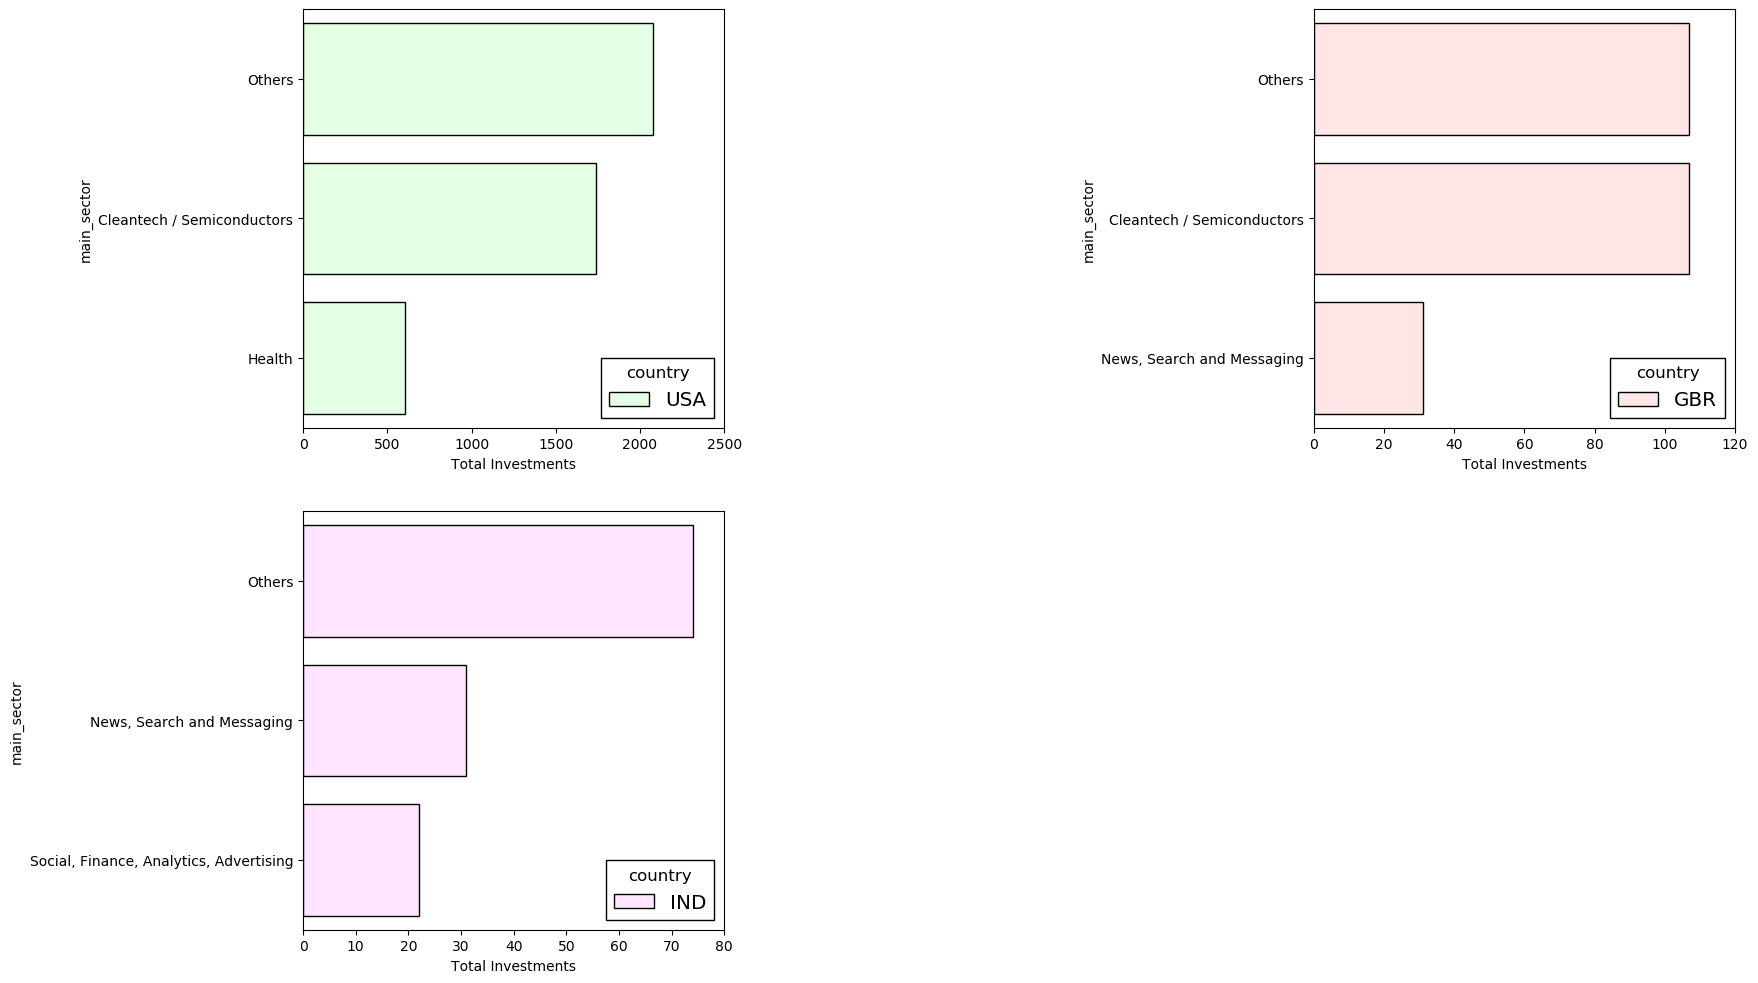

In [1659]:
# Draw plot
plt.figure(figsize=[25,25])
ax1 = plt.subplot(4, 4, 1)
ax2 = plt.subplot(4, 4, 3)
ax3 = plt.subplot(4, 4, 5)
plt.style.use('classic')

sns.barplot(y=top3_D1.index, x=top3_D1['count'], ax=ax1,hue=top3_D1.country,color='darkgreen',saturation=1).set(xlabel='Total Investments')
sns.barplot(y=top3_D2.index, x=top3_D2['count'], ax=ax2 ,hue=top3_D2.country, color = 'darkred', saturation=1).set(xlabel='Total Investments')
sns.barplot(y=top3_D3.index, x=top3_D3['count'], ax=ax3,hue=top3_D3.country, color ='purple', saturation=1).set(xlabel='Total Investments')


plt.show()

In [1669]:
# company received the highest investment for the sector that has been invested most number of times for USA
print(D1[D1['main_sector']=='Others'].groupby('name')['amount_usd_millions'].sum().reset_index().sort_values(by='amount_usd_millions',ascending=False).head(1))

# company received the highest investment for the sector that has been invested second most number of times for USA
D1[D1['main_sector']==r'Cleantech / Semiconductors'].groupby('name')['amount_usd_millions'].sum().reset_index().sort_values(by='amount_usd_millions',ascending=False).head(1)

             name  amount_usd_millions
1336  Virtustream                 64.3


,name,amount_usd_millions
1066,Tigo Energy,68.73


In [1670]:
# company received the highest investment for the sector that has been invested most number of times for GBR
print(D2[D2['main_sector']=='Others'].groupby('name')['amount_usd_millions'].sum().reset_index().sort_values(by='amount_usd_millions',ascending=False).head(1))

# company received the highest investment for the sector that has been invested second most number of times for GBR
D2[D2['main_sector']==r'Cleantech / Semiconductors'].groupby('name')['amount_usd_millions'].sum().reset_index().sort_values(by='amount_usd_millions',ascending=False).head(1)

              name  amount_usd_millions
26  Electric Cloud                 37.0


,name,amount_usd_millions
21,EUSA Pharma,35.6


In [1672]:
# company received the highest investment for the sector that has been invested most number of times for IND
print(D3[D3['main_sector']=='Others'].groupby('name')['amount_usd_millions'].sum().reset_index().sort_values(by='amount_usd_millions',ascending=False).head(1))

# company received the highest investment for the sector that has been invested second most number of times for IND
D3[D3['main_sector']=='News, Search and Messaging'].groupby('name')['amount_usd_millions'].sum().reset_index().sort_values(by='amount_usd_millions',ascending=False).head(1)

            name  amount_usd_millions
17  FirstCry.com                 39.0


,name,amount_usd_millions
5,GupShup,33.0


#### Spark Funds might chose to invest in one of the top3 sectors of top3 countries based on their business requirement